In [1]:
import os
import zipfile
import random
import shutil
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.layers import  Dense, Flatten, Input,Dropout
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
print(tf.version.VERSION)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.test.gpu_device_name()
import pandas as pd 
import numpy as np
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Sequential,load_model
import matplotlib.pyplot as plt
from random import randint
import cv2
import matplotlib.image as mpimg

2.4.1


In [2]:
# load data train and test
TRAINING_DIR ="../input/fire-smoke/Fire_Smoke/Train"
train_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=8,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    target_size=(150, 150))

VALIDATION_DIR = "../input/fire-smoke/Fire_Smoke/Test"
validation_datagen = ImageDataGenerator(rescale=1./255.,
                                        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=8,
                                                              shuffle = False,
                                                              class_mode='categorical',
                                                              color_mode='rgb',
                                                              target_size=(150, 150))

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
# crate network
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (150,150,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(3,activation= "softmax"))

epochs = 500
batch_size = 8
ler=0.0005

opt = Adam(lr = ler , decay = ler / epochs)
model.compile(loss = "categorical_crossentropy" , optimizer = opt , metrics=["accuracy"])

model.summary()

# fit network
history = model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 128)     1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 64)      32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0


--------chart---------


<AxesSubplot:>

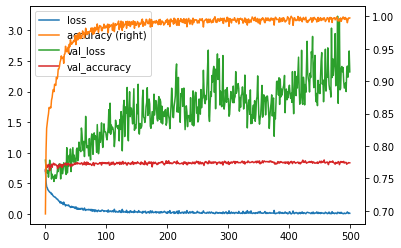

In [4]:
print("\n--------chart---------")
result = pd.DataFrame.from_dict(history.history)
result.plot.line(secondary_y=["accuracy"])

In [5]:
# predict Images
predict = model.predict(validation_generator)
preds_classes = np.argmax(predict, axis=-1)

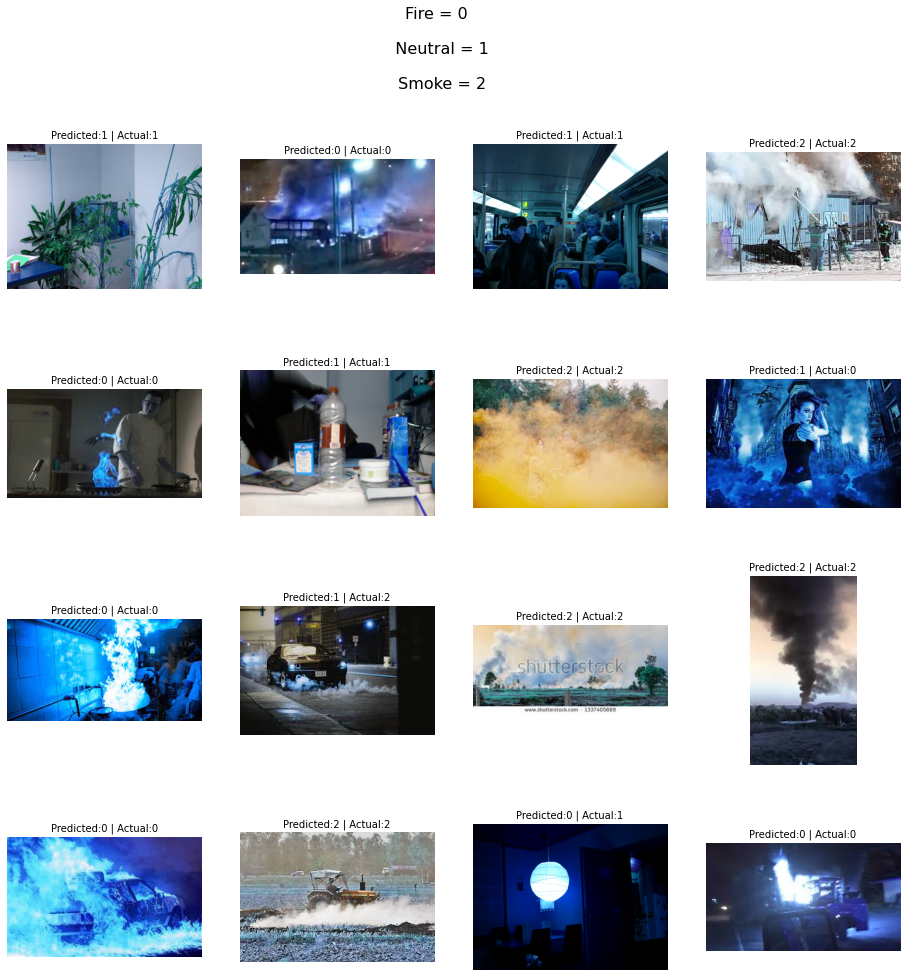

In [6]:
# Show images and labels and predicts
ncols=4
nrows=4

fig = plt.gcf()

fig.suptitle("Fire = 0 \n\n  Neutral = 1 \n\n Smoke = 2", fontsize=16)

fig.set_size_inches(ncols*4, nrows*4)

for i in range(16):
    
    random=randint(0, len(validation_generator.labels))
    prediction=preds_classes[random]
    img_path=validation_generator.filepaths[random]
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    sp.set_title(f'Predicted:{prediction} | Actual:{validation_generator.labels[random]}' ,fontsize=10)

    plt.imshow(cv2.cvtColor(mpimg.imread(img_path), cv2.COLOR_BGR2RGB))
    

plt.show()

In [8]:
model.save('CNNNetwork.h5',overwrite=True)